In [ ]:
!pip install scipy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# atividade 1
  carregar uma imagem e aplicar a equalização do histograma, salvar a imagem resultante


In [ ]:
imagem = cv2.imread("/content/image.jpg", cv2.IMREAD_GRAYSCALE)

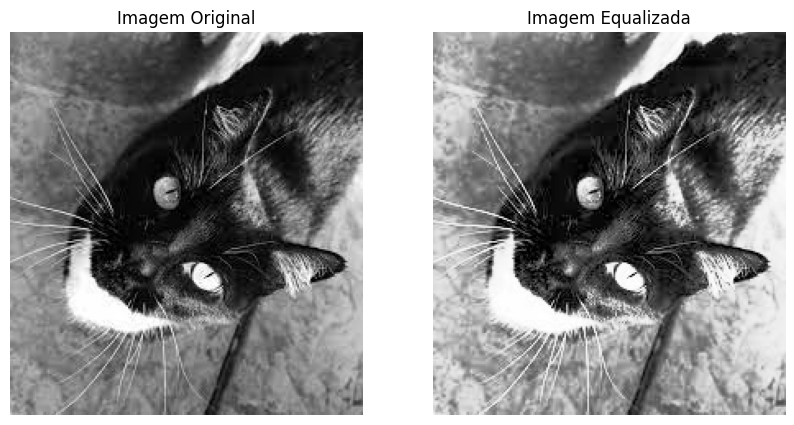

In [ ]:
imagem_equalizada = cv2.equalizeHist(imagem)

plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Imagem equalizada
plt.subplot(1, 2, 2)
plt.imshow(imagem_equalizada, cmap='gray')
plt.title("Imagem Equalizada")
plt.axis('off')

plt.show()

# atividade 2
utilizar uma imagem sub-exposta (subexposição) e aplique uma transformação de intensidade para aumentar o brilho, comparando a imagem de saída com a original (escrever uma análise sobre as diferenças)


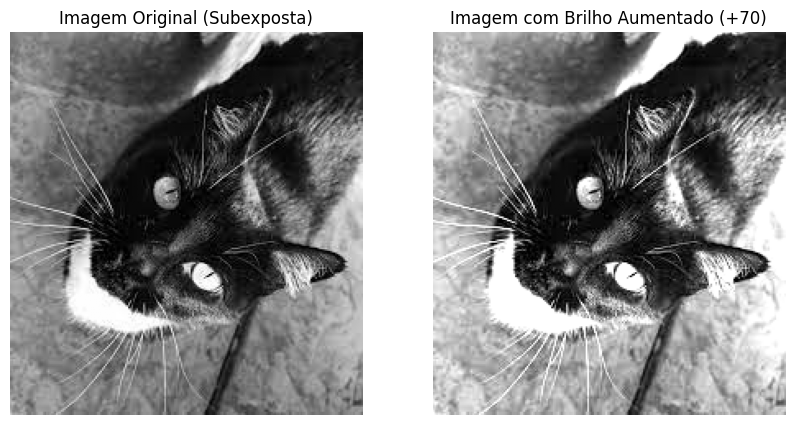

In [ ]:
valor_brilho = 70
imagem_brilho = cv2.add(imagem, valor_brilho)

imagem_brilho = np.clip(imagem_brilho, 0, 255)

plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original (Subexposta)")
plt.axis('off')

# Imagem com brilho aumentado
plt.subplot(1, 2, 2)
plt.imshow(imagem_brilho, cmap='gray')
plt.title(f"Imagem com Brilho Aumentado (+{valor_brilho})")
plt.axis('off')

plt.show()

#atividade 4
desenvolva um código que faça um ajuste de contraste de uma imagem utilizando uma função personalizada de sua autoria

# atividade 5
crie uma função que normalize os níveis de intensidade de uma imagem para o intervalo de 0 a 255 (intervalo fechado [0, 255]) e faça testes com diferentes imagens


In [ ]:
imagem1 = cv2.imread("/content/image.jpg", cv2.IMREAD_GRAYSCALE)
imagem2 = cv2.imread("/content/puppy-black-and-white-1519453.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
def normalizar_imagem(imagem):
    min_val = np.min(imagem)
    max_val = np.max(imagem)

    imagem_normalizada = 255 * (imagem - min_val) / (max_val - min_val) #intervalu ate 255

    imagem_normalizada = imagem_normalizada.astype(np.uint8)

    return imagem_normalizada

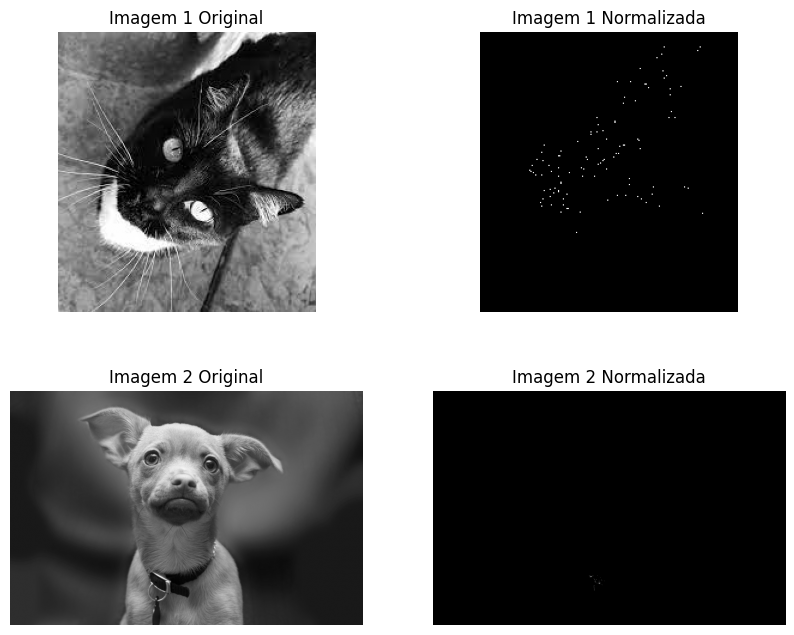

In [ ]:
imagem1_normalizada = normalizar_imagem(imagem1)
imagem2_normalizada = normalizar_imagem(imagem2)

plt.figure(figsize=(10, 8))

# Imagem 1
plt.subplot(2, 2, 1)
plt.imshow(imagem1, cmap='gray')
plt.title("Imagem 1 Original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(imagem1_normalizada, cmap='gray')
plt.title("Imagem 1 Normalizada")
plt.axis('off')

# Imagem 2
plt.subplot(2, 2, 3)
plt.imshow(imagem2, cmap='gray')
plt.title("Imagem 2 Original")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(imagem2_normalizada, cmap='gray')
plt.title("Imagem 2 Normalizada")
plt.axis('off')

plt.show()

#vatividade 6
escrever um algoritmo/código que aplique um filtro da média em uma imagem


In [ ]:
def filtro_media(imagem, tamanho_kernel):
    kernel = np.ones((tamanho_kernel, tamanho_kernel), np.float32) / (tamanho_kernel ** 2)

    imagem_suavizada = cv2.filter2D(imagem, -1, kernel)

    return imagem_suavizada          

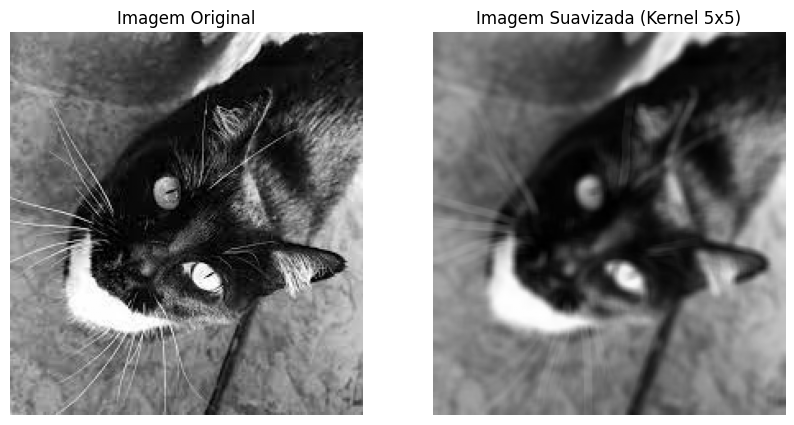

In [ ]:
tamanho_kernel = 5

imagem_suavizada = filtro_media(imagem, tamanho_kernel)

plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Imagem suavizada
plt.subplot(1, 2, 2)
plt.imshow(imagem_suavizada, cmap='gray')
plt.title(f"Imagem Suavizada (Kernel {tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')

plt.show()

#atividade 7
implementar um algoritmo que aplique o filtro da mediana em uma imagem


In [ ]:
def filtro_mediana(imagem, tamanho_kernel):
    imagem_suavizada = cv2.medianBlur(imagem, tamanho_kernel)
    return imagem_suavizada


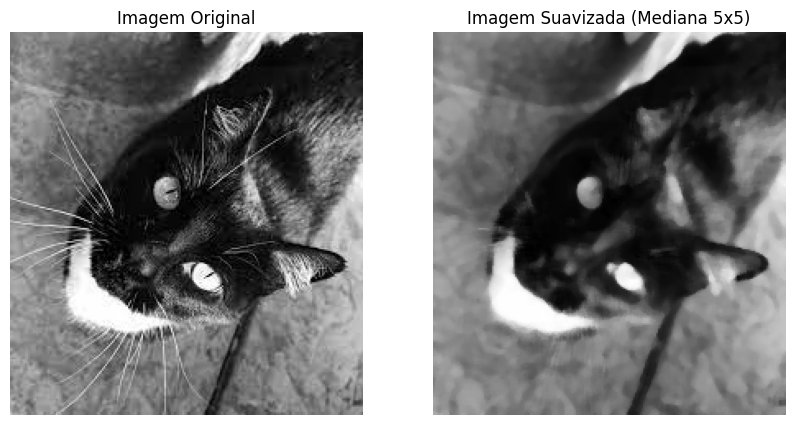

In [ ]:
imagem_suavizada = filtro_mediana(imagem, tamanho_kernel)

plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Imagem suavizada
plt.subplot(1, 2, 2)
plt.imshow(imagem_suavizada, cmap='gray')
plt.title(f"Imagem Suavizada (Mediana {tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')

plt.show()

# atividade 8
compare os resultados do filtro da média e da mediana análise completa (compare estatisticamente)


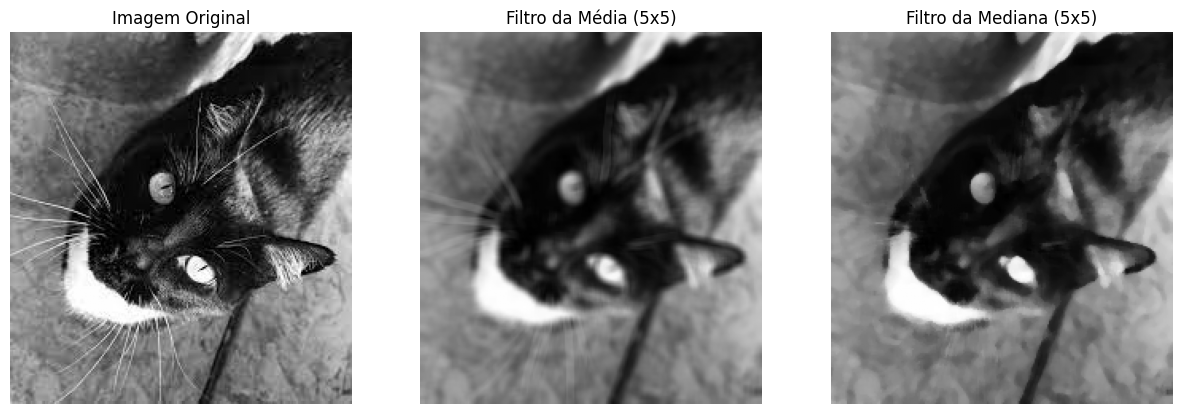

Análise Estatística - Original:
  Mínimo: 0
  Máximo: 255
  Média: 99.29
  Variância: 3877.56
  Assimetria: 0.23
  Curtose: -0.63

Análise Estatística - Filtro da Média:
  Mínimo: 5
  Máximo: 255
  Média: 99.26
  Variância: 3345.70
  Assimetria: 0.20
  Curtose: -0.56

Análise Estatística - Filtro da Mediana:
  Mínimo: 3
  Máximo: 255
  Média: 98.15
  Variância: 3619.84
  Assimetria: 0.25
  Curtose: -0.57



In [ ]:
imagem_media = filtro_media(imagem, tamanho_kernel)
imagem_mediana = filtro_mediana(imagem, tamanho_kernel)

plt.figure(figsize=(15, 5))

# Imagem original
plt.subplot(1, 3, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Imagem com filtro da média
plt.subplot(1, 3, 2)
plt.imshow(imagem_media, cmap='gray')
plt.title(f"Filtro da Média ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')

# Imagem com filtro de mediana
plt.subplot(1, 3, 3)
plt.imshow(imagem_mediana, cmap='gray')
plt.title(f"Filtro da Mediana ({tamanho_kernel}x{tamanho_kernel})")
plt.axis('off')

plt.show()

def analise_estatistica(imagem, nome):
    descricao = stats.describe(imagem.ravel())
    print(f"Análise Estatística - {nome}:")
    print(f"  Mínimo: {descricao.minmax[0]}")
    print(f"  Máximo: {descricao.minmax[1]}")
    print(f"  Média: {descricao.mean:.2f}")
    print(f"  Variância: {descricao.variance:.2f}")
    print(f"  Assimetria: {descricao.skewness:.2f}")
    print(f"  Curtose: {descricao.kurtosis:.2f}")
    print()

analise_estatistica(imagem, "Original")
analise_estatistica(imagem_media, "Filtro da Média")
analise_estatistica(imagem_mediana, "Filtro da Mediana")

# atividade 9
escreva um algoritmo que aplique o filtro de realce em imagens naturais (fotos de ambientes)


In [ ]:
def filtro_realce(imagem):
    kernel_aguçamento = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])

    imagem_realcada = cv2.filter2D(imagem, -1, kernel_aguçamento)

    return imagem_realcada

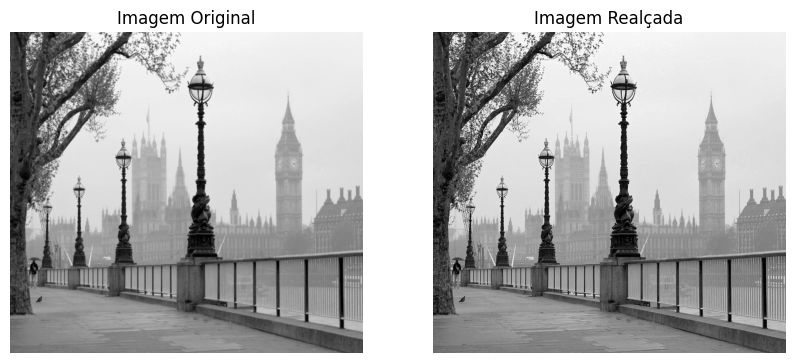

In [ ]:
imagemPaisagem = cv2.imread("/content/image.png", cv2.IMREAD_COLOR)

imagem_cinza = cv2.cvtColor(imagemPaisagem, cv2.COLOR_BGR2GRAY)

imagem_realcada = filtro_realce(imagem_cinza)

plt.figure(figsize=(10, 5))

# Imagem original
plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Imagem realçada
plt.subplot(1, 2, 2)
plt.imshow(imagem_realcada, cmap='gray')
plt.title("Imagem Realçada")
plt.axis('off')

plt.show()

# atividade 10
escreva um algoritmo que aplique o filtro de SOBEL nas direções x,y (horizontal e vertical) e compare os resultados com a original


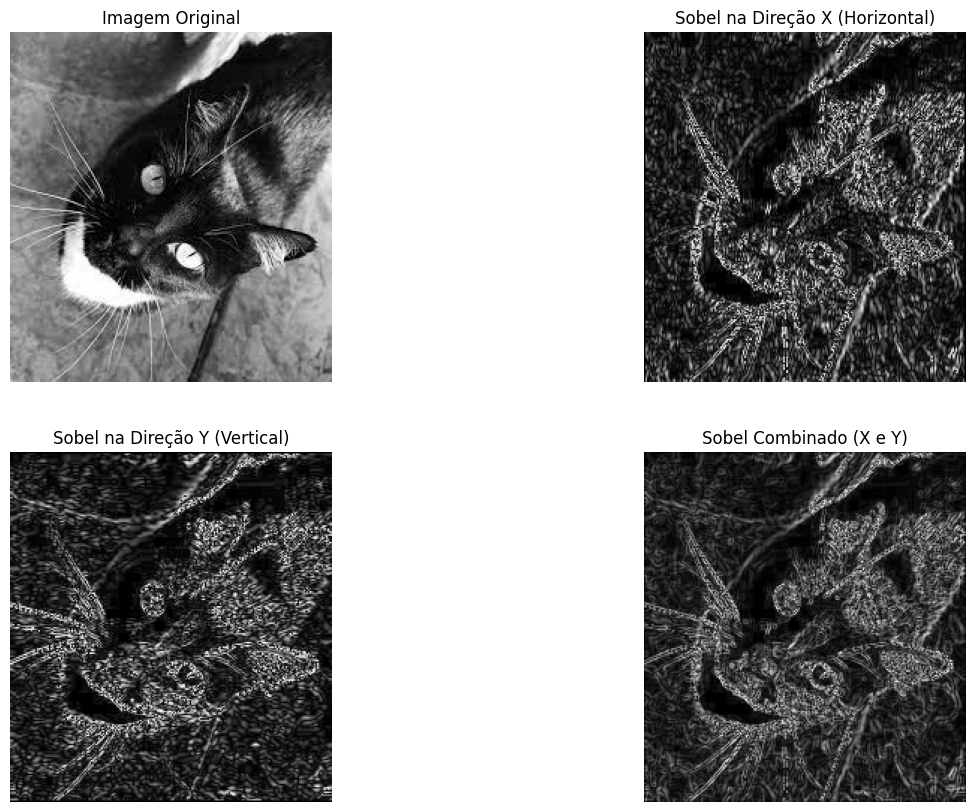

In [56]:
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)

sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))

sobel_combinado = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

# Sobel na direção x (horizontal)
plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel na Direção X (Horizontal)")
plt.axis('off')

# Sobel na direção y (vertical)
plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel na Direção Y (Vertical)")
plt.axis('off')

# Sobel combinado (x e y)
plt.subplot(2, 2, 4)
plt.imshow(sobel_combinado, cmap='gray')
plt.title("Sobel Combinado (X e Y)")
plt.axis('off')

plt.show()